In [1]:
# ２乗和誤差
import numpy as np
def sum_squared_error(y, t):
    y = np.array(y)
    t = np.array(t)
    return 0.5 * np.sum((y-t)**2)

In [2]:
# 「2」を正解とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # 教師データ

# 例１. 「2」の確率が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # ニューラルネットワークの出力（ソフトマックス関数による出力）

sum_squared_error(y, t)

0.09750000000000003

In [3]:
# 例２. 「7」の確率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

sum_squared_error(y, t)

0.5975

In [4]:
# 交差エントロピー誤差
def cross_entropy_error(y, t):
    delta = 1e-7 # np.log(0)=-inf の防止策
    y = np.array(y)
    t = np.array(t)
    return -np.sum(t * np.log(y + delta)) # one-hotベクトルを使えば、実質的に正解ラベルが１に対応する出力の自然対数を計算するだけとなる。

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(y, t)

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(y, t)

2.302584092994546

In [7]:
# ミニバッチ学習
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) # normalize=True:画素値を 0〜255 → 0.0〜1.0 に変換
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0] # 60000
batch_size = 10 # 1回の学習で使用するデータの数（今回は10件）
batch_mask = np.random.choice(train_size, batch_size) # 0〜59999の中からランダムに10個のインデックスを取得
                                                      # batch_mask には [3054, 14422, 982, ...] のような整数配列が入る
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

# ディープラーニングでは、全データでの一括学習は計算コストが高く、1件ずつではノイズが多い。
# そのため、「小さなまとまり（バッチ）」で学習を進めるのが主流。
# これにより、学習の安定性と効率を両立できる。

(60000, 784)
(60000, 10)


In [8]:
# バッチ対応版の交差エントロピー誤差
def cross_entropy_error(y, t):
    if y.ndim == 1: # データ一つあたりの交差エントロピー誤差を求める場合
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [9]:
# 教師データがラベルとして与えられたとき（one-hot表現ではなく、「２」や「７」といったラベルとして与えられたとき）
def cross_entropy_error(y, t):
    if y.ndim == 1: # NNの出力（予測）が1次元（バッチ＝１）の場合
        t = t.reshape(1, t.size) # t=[0,0,1]の時、(1,3)の2次元に変換（形状を揃えることで後のバッチ計算を可能とする。）
        y = y.reshape(1, y.size) # y=[0.2,0.3,0.5]の時、(1,3)の2次元に変換（形状を揃えることで後のバッチ計算を可能とする。）
    batch_size = y.shape[0] # y.shape[0]=バッチのデータ数 y=(batch_size, num_classes) num_classes=10(「0」〜「9」までの10種類）
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    # np.arange(batch_size):0,1,2,・・・,batch_size-1の整数配列を作成する。batch_size=5だとすると、[0, 1, 2, 3, 4]
    # t:教師ラベルで、例えば[2, 7, 0, 5, 3]のように、各サンプルのクラスラベルを含んでいる
    # y[np.arange(batch_size) ,t]: y配列の各行において、t配列の対応するインデックス（ラベル）に該当する確率を取得する
    # 例えば、y[0, t[0]]は、yの最初のサンプル（インデックス0）の、ラベルt[0]のクラス（例えば「２」）の予測確率を取り出す。
    # 実装のポイントは、one-hot表現でtが0の要素は、交差エントロピー誤差も0であるから、その計算は無視しても良いということ
    # 言い換えれば、正解ラベルに対して、ニューラルネットワークの出力を得ることができれば、交差エントロピー誤差は計算することができる

In [10]:
# 数値微分
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) / (2*h) # 中心差分

# 微小な差分によって微分を求めることを数値微分（numerical differentiation)という
# 一方、数式の展開によって微分を求めることを解析的（analytic）という言葉を用いて、「解析的に解く」などと言う。

In [11]:
# 例題
def function_1(x):
    return 0.01*x**2 + 0.1*x

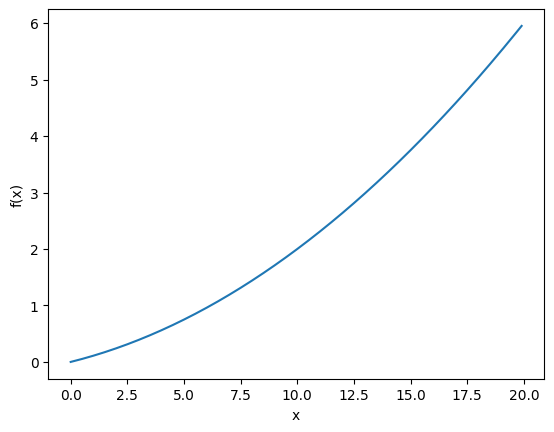

In [12]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0から20まで、0.1刻みのx配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [13]:
numerical_diff(function_1, 5)

0.1999999999990898

In [14]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898
0.2999999999986347


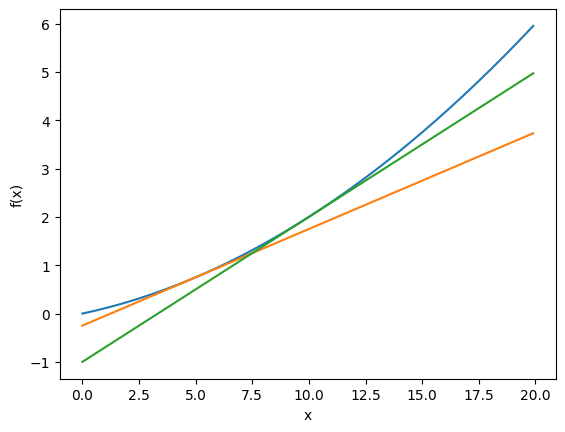

In [15]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x): # 与えられた関数 f と点 x における接線を計算する関数
    d = numerical_diff(f, x) # 点xにおける接線の傾き
    print(d)
    y = f(x) - d*x # 切片を求める
    return lambda t: d*t + y # 匿名関数。tに対する接線の値を計算する
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x) # 接線のyの値を計算

tf2 = tangent_line(function_1, 10)
y3 = tf2(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

In [16]:
# 偏微分
def function_2(x):
    return x[0]**2 + x[1]**2

# x[0]=3,x[1]=4のときのx[0]に対する偏微分
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [17]:
# x[0]=3,x[1]=4のときのx[1]に対する偏微分
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)


7.999999999999119

In [18]:
# 関数fの勾配（gradient)を数値微分を使って、ベクトルxの各要素に対して計算する関数

def numerical_gradient(f, x):
    h = 1e-4 # 0.0004
    grad = np.zeros_like(x) # xと同じ形状の0配列を作る（勾配ベクトルの初期化）

    for idx in range(x.size): # xの各要素についてループ。x.size は要素数
        tmp_val = x[idx] # tmp_val に元の値を一時保存する（後で元すため）。
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す

    return grad

In [19]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [20]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [21]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

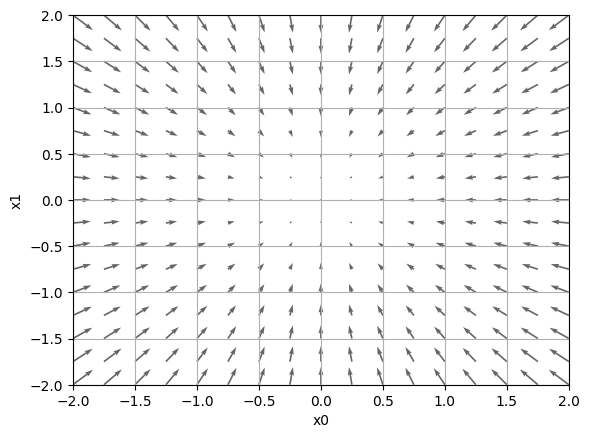

In [22]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X): # X の各要素を x として取り出しつつ、その**何番目か（インデックス）**も一緒に idx に取り出す
            grad[idx] = _numerical_gradient_no_batch(f, x) #X の各ベクトル x に対して、個別に _numerical_gradient_no_batch() を呼び出し、各行の勾配を計算。
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) #axis=1 は行ごとに処理する（横に計算を進める）。各ベクトルの要素ごとの計算をするときに使う。


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__': # スクリプトが直接実行されたときのみ以下のコードを実行する」というお決まりの構文
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1) # 2次元平面の座標格子を作成
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()
    

In [23]:
# 勾配降下法の実装
def gradient_descent(f, init_x, lr=0.01, step_num=100): # lr:学習率(learning rate), step_num:更新ステップ数（何回更新するか）
    x = init_x # 現在のパラメータ x を初期値から開始

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [24]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

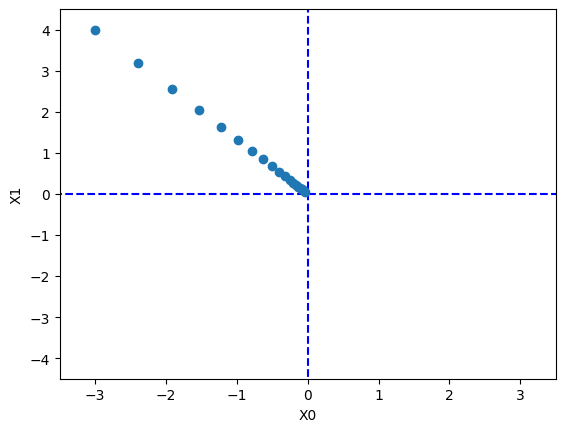

In [25]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [26]:
# 学習率が大きすぎる例：lr=10.0  ＜結果：大きな値へと発散してしまう＞
def gradient_descent(f, init_x, lr=0.01, step_num=100): # lr:学習率(learning rate), step_num:更新ステップ数（何回更新するか）
    x = init_x # 現在のパラメータ x を初期値から開始

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [27]:
# 学習率が小さすぎる例：lr=1e-10   ＜結果：ほとんど更新さずに終わってしまう＞
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [28]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [29]:
net = simpleNet()
print(net.W)

[[ 2.1764384   0.17217023 -2.40542261]
 [ 0.25569604  1.27774177  0.35621621]]


In [30]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.53598948  1.25326974 -1.12265898]


In [31]:
np.argmax(p)

0

In [32]:
t = np.array([0, 0, 1])
net.loss(x, t)

3.2595537373231327

In [33]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.32898731  0.24796793 -0.57695524]
 [ 0.49348096  0.3719519  -0.86543286]]


In [34]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) 
            # np.random.randn(input_size, hidden_size) : 標準正規分布に従う乱数を引数(入力層のニューロン数、隠れ層のニューロン数）の2次元配列で生成
            # weight_init_std : 重みの初期化のスケーリングファクター。初期化時に適切なスケールを使用することで、学習が効率よく行えるようになる。
        self.params['b1'] = np.zeros(hidden_size) # hidden_size個のゼロで構成された一次元配列を生成する。
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:入力データ、t:教師データ
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 各行に対して最大の値を持つインデックスを取得
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0]) 
            # x.shape[0] は、入力データ x のサンプル数、つまりデータセット内のサンプルの数を返す
            # 例えば、x が (100, 784) の形状のデータであれば、x.shape[0] は 100 となる
        return accuracy

    # x:入力データ,t:教師データ
    def numerical_gradient(self, x, t): # 重み W に関して勾配を計算することを目的とする
        loss_W = lambda W: self.loss(x, t) # ラムダ関数を使って、損失関数（loss function）を W に依存する形で定義する
            # 入力 x と教師データ t は、損失関数にとって既に固定されているため、ネットワークの重み W に基づいて損失を計算する形にする必要がある。
            # ラムダ関数（lambda function）は、Pythonにおける匿名関数（名前のない関数）を定義するための機能。
            # ラムダ関数を使用することで、簡単な関数を一行で定義でき、通常の関数定義（def）を使うよりも短く書くことができる。
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # from common.gradient import numerical_gradient の関数を呼び出している
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [35]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [36]:
net.params['b1'].shape

(100,)

In [37]:
net.params['W2'].shape

(100, 10)

In [38]:
net.params['b2'].shape

(10,)

In [39]:
x = np.random.rand(100,784) 
    # 100行784列のランダムな値を持つ2次元配列を生成。生成される値は、0以上1未満 の一様分布に従う乱数。
    # MNISTの画像は、28x28ピクセル（784個の特徴量）であり、画像データ100枚分をダミー生成している。
t = np.random.rand(100,10) # ダミーの正解ラベル100枚分

In [40]:
grads = net.numerical_gradient(x, t)

In [41]:
grads['W1'].shape

(784, 100)

In [44]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000 # 勾配法による更新の回数＝iteration
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版！

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7804, 0.7893
train acc, test acc | 0.88075, 0.8834
train acc, test acc | 0.90025, 0.9036
train acc, test acc | 0.9076666666666666, 0.912
train acc, test acc | 0.9149333333333334, 0.9175
train acc, test acc | 0.92035, 0.9229
train acc, test acc | 0.9245833333333333, 0.9269
train acc, test acc | 0.9275, 0.929
train acc, test acc | 0.93065, 0.931
train acc, test acc | 0.9326333333333333, 0.9333
train acc, test acc | 0.9356, 0.9373
train acc, test acc | 0.9382833333333334, 0.9384
train acc, test acc | 0.94105, 0.9406
train acc, test acc | 0.9423166666666667, 0.9412
train acc, test acc | 0.9442333333333334, 0.9426
train acc, test acc | 0.9468333333333333, 0.9451


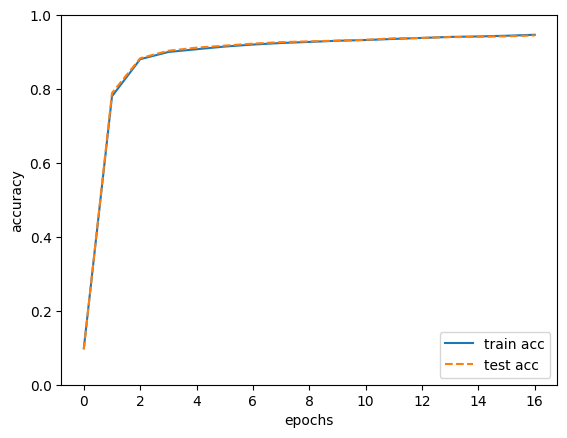

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
 # normalize=True は、データの正規化を行っている（画素値を0から1の範囲にスケーリング）
 # one_hot_label=True は、ラベルをOne-Hotエンコーディング形式で読み込む

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000 
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) 
 # エポック：訓練データ全体を1回使い切ること
 # イテレーション：訓練データからランダムに選んだ1バッチに対して、勾配の計算とパラメータの更新を行うこと
 # １エポックあたりのイテレーション数 = 訓練データ数(60000) / バッチサイズ(100) = 600
 # 今回はイテレーション数が10000、なので、エポック数は、10000 / 600 = 16.67
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size) # train_size(60000)からbatch_size(100)だけランダムにインデックスを取得する
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'} # 円形（'o'）,四角形（'s'）のマーカーを使用する
x = np.arange(len(train_acc_list)) # np.arange(len(train_acc_list)) は、0からlen(train_acc_list) - 1 までの整数の配列を作成。x軸として使用
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right') # legendは、プロットに凡例を追加する関数です。loc='lower right'は、凡例をグラフの右下に配置
plt.show()